In [3]:
import numpy as np
# To install scipy with conda, run the following command in a terminal or Jupyter cell:
# !conda install scipy -y

from scipy.integrate import odeint

# In Python, you typically use pip to install packages, but in Jupyter you can use ! or %pip.
# Equivalent Python libraries:
# - deSolve: scipy.integrate (for ODE solving)
# - ggplot2: matplotlib or plotnine
# - patchwork: matplotlib's subplot or plotnine's + operator

# Install packages (uncomment if needed)
# %pip install scipy matplotlib plotnine

import matplotlib.pyplot as plt

In [4]:
def SICZ(x, t, parameters):
    # Extract state variables
    S, I, C, Z = x
    N = S + I + C

    # Extract parameters
    beta_p = parameters['beta_p']  # transmission
    beta_c = parameters['beta_c']  # transmission from carcass
    beta_z = parameters['beta_z']  # transmission from zoospore pool
    a = parameters['a']            # disease induced death rate
    lamdaC = parameters['lamdaC']  # decay of carcass
    sigma = parameters['sigma']    # shed rate from infected
    mu = parameters['mu']          # shed rate from carcass
    lamdaZ = parameters['lamdaZ']  # decay rate of zoospores
    r = parameters['r']            # recovery rate

    # Differential equations
    dS = -(S * beta_p * (I / N)) - (S * beta_c * C) - (S * beta_z * Z)
    dI = (S * beta_p * (I / N)) + (S * beta_c * C) + (S * beta_z * Z) - (I * a)
    dC = (I * a) - (C * lamdaC)
    dZ = (I * sigma) + (C * mu) - (Z * lamdaZ)

    return [dS, dI, dC, dZ]


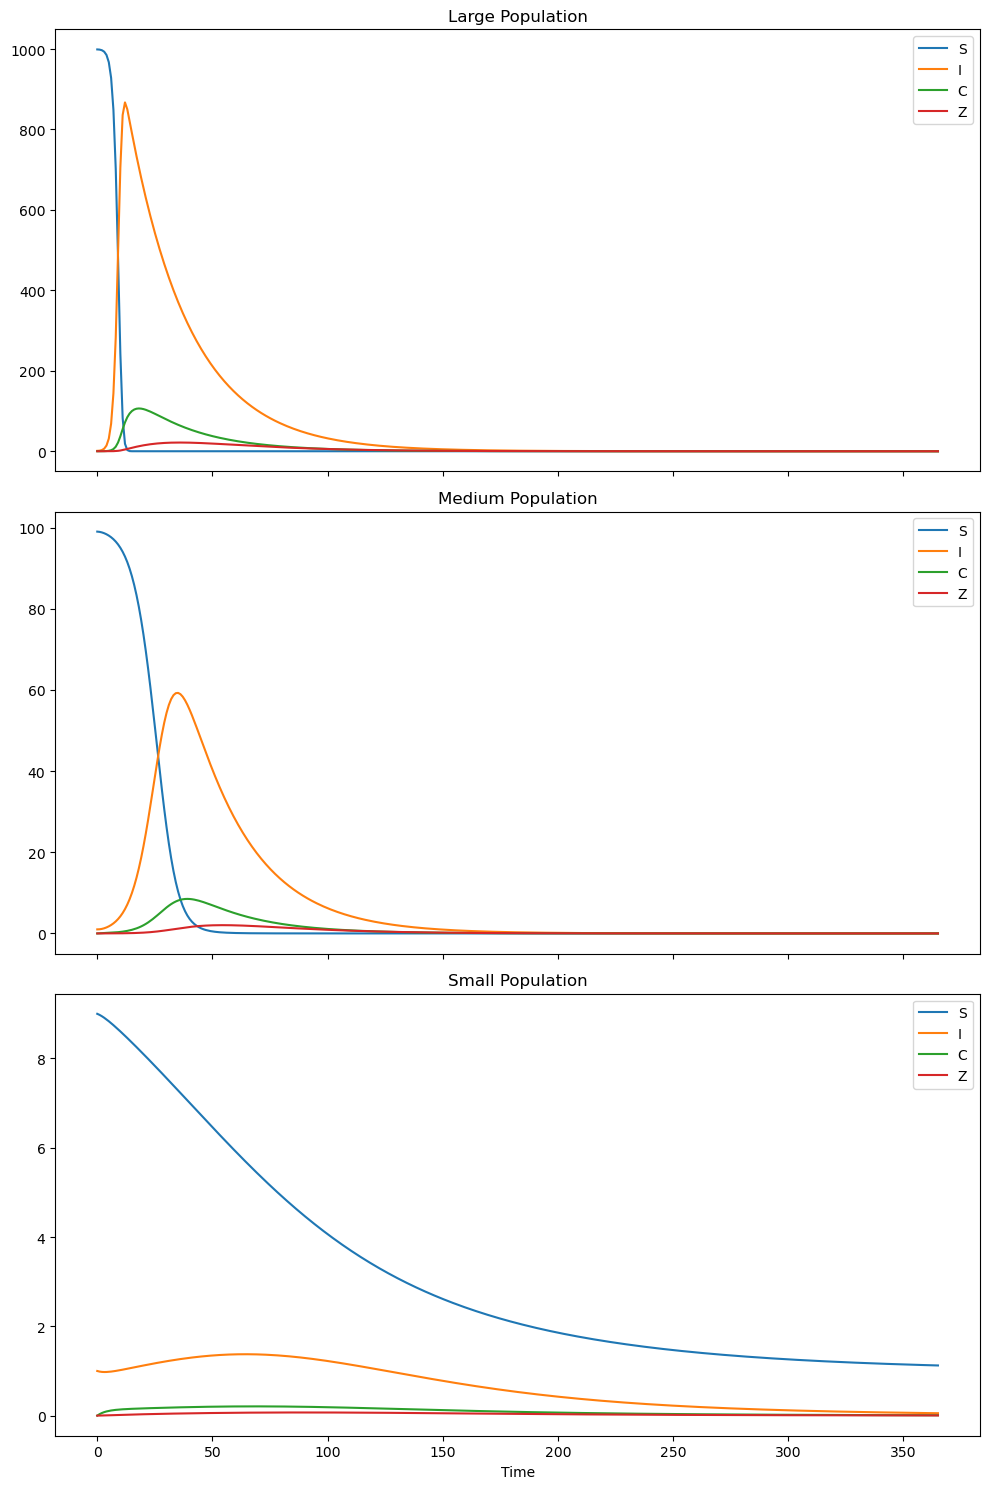

In [6]:
import pandas as pd

# Initial conditions for each population size
initial_cond_Large = [999, 1, 0, 0]  # S, I, C, Z
initial_cond_Med = [99, 1, 0, 0]
initial_cond_Small = [9, 1, 0, 0]

# Time points
times = np.linspace(0, 365, num=365)

# Parameters as a dictionary
params = {
    "beta_p": 0.023,
    "beta_c": 0.023,
    "beta_z": 0.0001,
    "lamdaC": 1/4,
    "lamdaZ": 1/21.6,
    "sigma": 0.001,
    "mu": 0.01,
    "a": 1/26.5,
    "r": 0  # Added recovery rate parameter, set to 0 if not used
}

# Solve ODEs
resultsSICZLarge = odeint(SICZ, initial_cond_Large, times, args=(params,))
resultsSICZMed = odeint(SICZ, initial_cond_Med, times, args=(params,))
resultsSICZSmall = odeint(SICZ, initial_cond_Small, times, args=(params,))

# Convert results to DataFrames
dfLarge = pd.DataFrame(resultsSICZLarge, columns=['S', 'I', 'C', 'Z'])
dfLarge['time'] = times
dfMed = pd.DataFrame(resultsSICZMed, columns=['S', 'I', 'C', 'Z'])
dfMed['time'] = times
dfSmall = pd.DataFrame(resultsSICZSmall, columns=['S', 'I', 'C', 'Z'])
dfSmall['time'] = times

# Plot using matplotlib
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Large Population
axes[0].plot(dfLarge['time'], dfLarge['S'], label='S')
axes[0].plot(dfLarge['time'], dfLarge['I'], label='I')
axes[0].plot(dfLarge['time'], dfLarge['C'], label='C')
axes[0].plot(dfLarge['time'], dfLarge['Z'], label='Z')
axes[0].set_title('Large Population')
axes[0].legend()

# Medium Population
axes[1].plot(dfMed['time'], dfMed['S'], label='S')
axes[1].plot(dfMed['time'], dfMed['I'], label='I')
axes[1].plot(dfMed['time'], dfMed['C'], label='C')
axes[1].plot(dfMed['time'], dfMed['Z'], label='Z')
axes[1].set_title('Medium Population')
axes[1].legend()

# Small Population
axes[2].plot(dfSmall['time'], dfSmall['S'], label='S')
axes[2].plot(dfSmall['time'], dfSmall['I'], label='I')
axes[2].plot(dfSmall['time'], dfSmall['C'], label='C')
axes[2].plot(dfSmall['time'], dfSmall['Z'], label='Z')
axes[2].set_title('Small Population')
axes[2].legend()

plt.xlabel('Time')
plt.tight_layout()
plt.show()

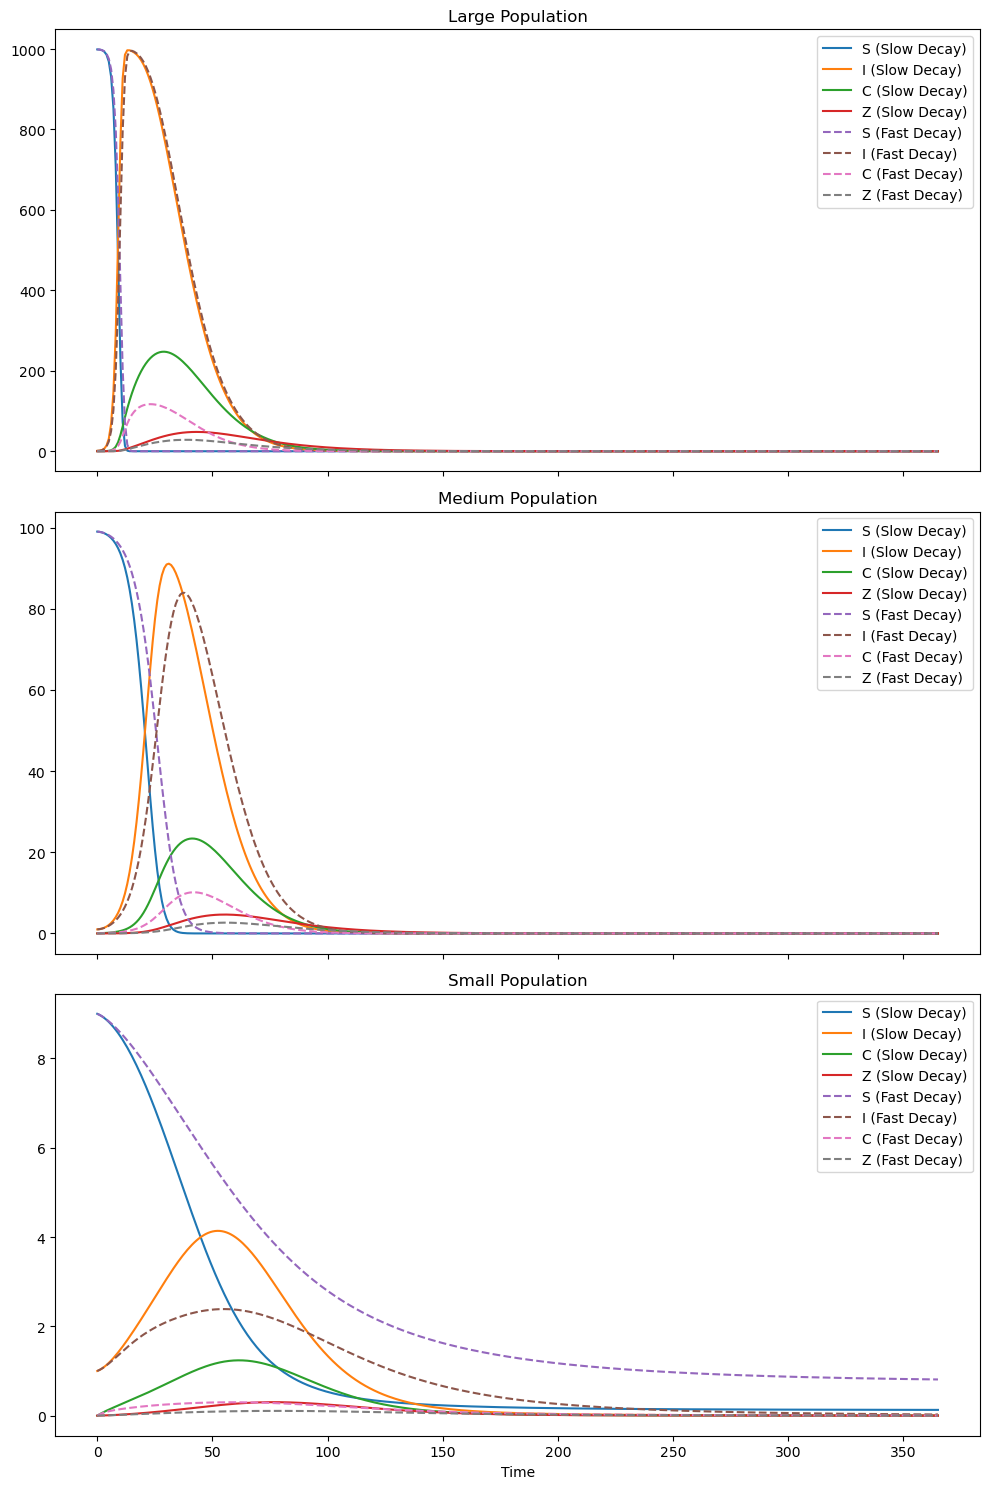

In [7]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd

import matplotlib.pyplot as plt

def SICZ_gamma(x, t, parameters):
    S, I1, I2, I3, I4, I5, C, Z = x
    I = I1 + I2 + I3 + I4 + I5
    N = S + I + C

    beta_p = parameters['beta_p']
    beta_c = parameters['beta_c']
    beta_z = parameters['beta_z']
    a = parameters['a']
    lamdaC = parameters['lamdaC']
    sigma = parameters['sigma']
    mu = parameters['mu']
    lamdaZ = parameters['lamdaZ']

    dS = -(S * beta_p * (I / N)) - (S * beta_c * C) - (S * beta_z * Z)
    dI1 = (S * beta_p * (I / N)) + (S * beta_c * C) + (S * beta_z * Z) - (5 * I1 * a)
    dI2 = (5 * I1 * a) - (5 * I2 * a)
    dI3 = (5 * I2 * a) - (5 * I3 * a)
    dI4 = (5 * I3 * a) - (5 * I4 * a)
    dI5 = (5 * I4 * a) - (5 * I5 * a)
    dC = (I * a) - (C * lamdaC)
    dZ = (I * sigma) + (C * mu) - (Z * lamdaZ)

    return [dS, dI1, dI2, dI3, dI4, dI5, dC, dZ]

initial_cond_Large = [999, 1, 0, 0, 0, 0, 0, 0]
initial_cond_Med = [99, 1, 0, 0, 0, 0, 0, 0]
initial_cond_Small = [9, 1, 0, 0, 0, 0, 0, 0]

times = np.linspace(0, 365, 365)
newparams = {'beta_p': 0.023, 'beta_c': 0.023, 'beta_z': 0.0001, 'lamdaC': 1/10, 'lamdaZ': 1/21.6, 'sigma': 0.001, 'mu': 0.01, 'a': 0.17/5.4}
params = {'beta_p': 0.023, 'beta_c': 0.023, 'beta_z': 0.0001, 'lamdaC': 1/4, 'lamdaZ': 1/21.6, 'sigma': 0.001, 'mu': 0.01, 'a': 0.17/5.4}

resultsSICZGammaLarge_SlowDecay = odeint(SICZ_gamma, initial_cond_Large, times, args=(newparams,))
resultsSICZGammaMed_SlowDecay = odeint(SICZ_gamma, initial_cond_Med, times, args=(newparams,))
resultsSICZGammaSmall_SlowDecay = odeint(SICZ_gamma, initial_cond_Small, times, args=(newparams,))
resultsSICZGammaSmall_FastDecay = odeint(SICZ_gamma, initial_cond_Small, times, args=(params,))
resultsSICZGammaMed_FastDecay = odeint(SICZ_gamma, initial_cond_Med, times, args=(params,))
resultsSICZGammaLarge_FastDecay = odeint(SICZ_gamma, initial_cond_Large, times, args=(params,))


def make_df(results, times):
    df = pd.DataFrame(results, columns=['S','I1','I2','I3','I4','I5','C','Z'])
    df['I'] = df[['I1','I2','I3','I4','I5']].sum(axis=1)
    df['time'] = times
    return df

dfGammaLarge_SlowDecay = make_df(resultsSICZGammaLarge_SlowDecay, times)
dfGammaLarge_FastDecay = make_df(resultsSICZGammaLarge_FastDecay, times)
dfGammaMed_SlowDecay = make_df(resultsSICZGammaMed_SlowDecay, times)
dfGammaMed_FastDecay = make_df(resultsSICZGammaMed_FastDecay, times)
dfGammaSmall_SlowDecay = make_df(resultsSICZGammaSmall_SlowDecay, times)
dfGammaSmall_FastDecay = make_df(resultsSICZGammaSmall_FastDecay, times)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Large population
axes[0].plot(dfGammaLarge_SlowDecay['time'], dfGammaLarge_SlowDecay['S'], label='S (Slow Decay)')
axes[0].plot(dfGammaLarge_SlowDecay['time'], dfGammaLarge_SlowDecay['I'], label='I (Slow Decay)')
axes[0].plot(dfGammaLarge_SlowDecay['time'], dfGammaLarge_SlowDecay['C'], label='C (Slow Decay)')
axes[0].plot(dfGammaLarge_SlowDecay['time'], dfGammaLarge_SlowDecay['Z'], label='Z (Slow Decay)')
axes[0].plot(dfGammaLarge_FastDecay['time'], dfGammaLarge_FastDecay['S'], '--', label='S (Fast Decay)')
axes[0].plot(dfGammaLarge_FastDecay['time'], dfGammaLarge_FastDecay['I'], '--', label='I (Fast Decay)')
axes[0].plot(dfGammaLarge_FastDecay['time'], dfGammaLarge_FastDecay['C'], '--', label='C (Fast Decay)')
axes[0].plot(dfGammaLarge_FastDecay['time'], dfGammaLarge_FastDecay['Z'], '--', label='Z (Fast Decay)')
axes[0].set_title('Large Population')
axes[0].legend()

# Medium population
axes[1].plot(dfGammaMed_SlowDecay['time'], dfGammaMed_SlowDecay['S'], label='S (Slow Decay)')
axes[1].plot(dfGammaMed_SlowDecay['time'], dfGammaMed_SlowDecay['I'], label='I (Slow Decay)')
axes[1].plot(dfGammaMed_SlowDecay['time'], dfGammaMed_SlowDecay['C'], label='C (Slow Decay)')
axes[1].plot(dfGammaMed_SlowDecay['time'], dfGammaMed_SlowDecay['Z'], label='Z (Slow Decay)')
axes[1].plot(dfGammaMed_FastDecay['time'], dfGammaMed_FastDecay['S'], '--', label='S (Fast Decay)')
axes[1].plot(dfGammaMed_FastDecay['time'], dfGammaMed_FastDecay['I'], '--', label='I (Fast Decay)')
axes[1].plot(dfGammaMed_FastDecay['time'], dfGammaMed_FastDecay['C'], '--', label='C (Fast Decay)')
axes[1].plot(dfGammaMed_FastDecay['time'], dfGammaMed_FastDecay['Z'], '--', label='Z (Fast Decay)')
axes[1].set_title('Medium Population')
axes[1].legend()

# Small population
axes[2].plot(dfGammaSmall_SlowDecay['time'], dfGammaSmall_SlowDecay['S'], label='S (Slow Decay)')
axes[2].plot(dfGammaSmall_SlowDecay['time'], dfGammaSmall_SlowDecay['I'], label='I (Slow Decay)')
axes[2].plot(dfGammaSmall_SlowDecay['time'], dfGammaSmall_SlowDecay['C'], label='C (Slow Decay)')
axes[2].plot(dfGammaSmall_SlowDecay['time'], dfGammaSmall_SlowDecay['Z'], label='Z (Slow Decay)')
axes[2].plot(dfGammaSmall_FastDecay['time'], dfGammaSmall_FastDecay['S'], '--', label='S (Fast Decay)')
axes[2].plot(dfGammaSmall_FastDecay['time'], dfGammaSmall_FastDecay['I'], '--', label='I (Fast Decay)')
axes[2].plot(dfGammaSmall_FastDecay['time'], dfGammaSmall_FastDecay['C'], '--', label='C (Fast Decay)')
axes[2].plot(dfGammaSmall_FastDecay['time'], dfGammaSmall_FastDecay['Z'], '--', label='Z (Fast Decay)')
axes[2].set_title('Small Population')
axes[2].legend()

axes[2].set_xlabel('Time')
plt.tight_layout()
plt.show()


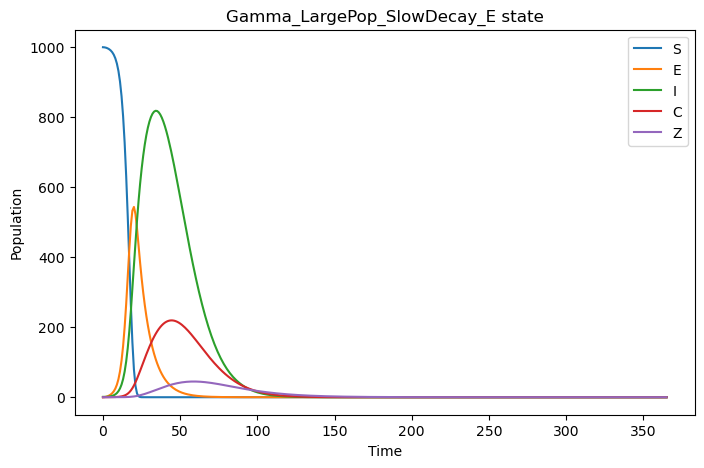

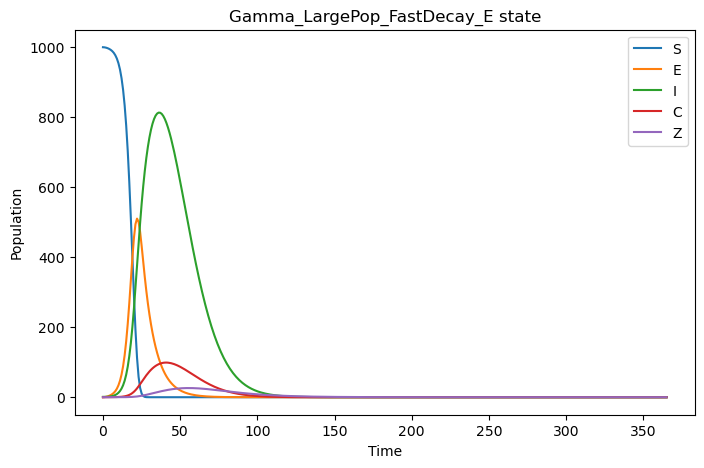

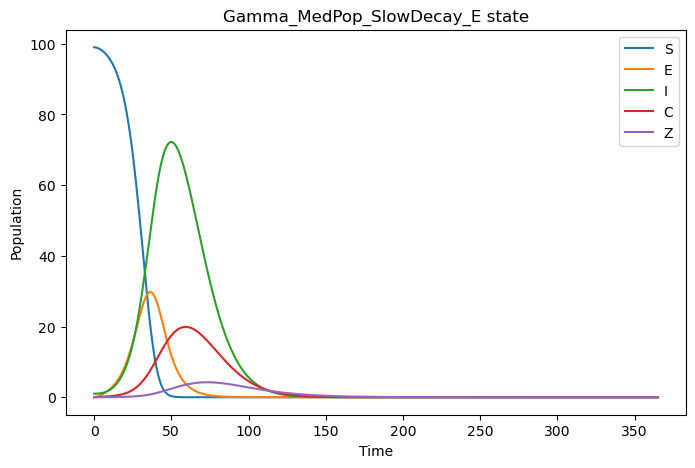

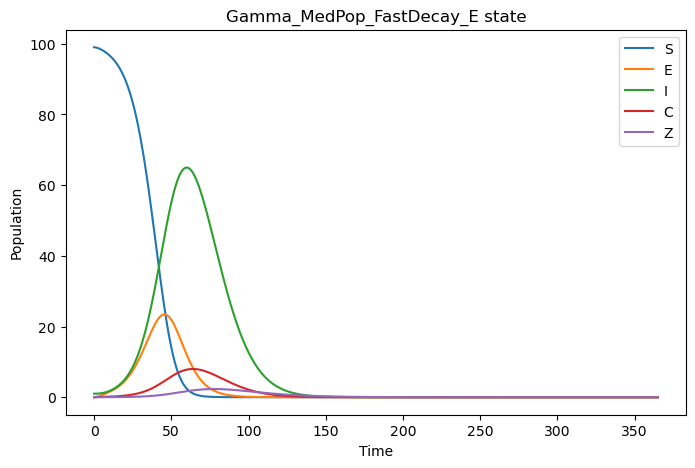

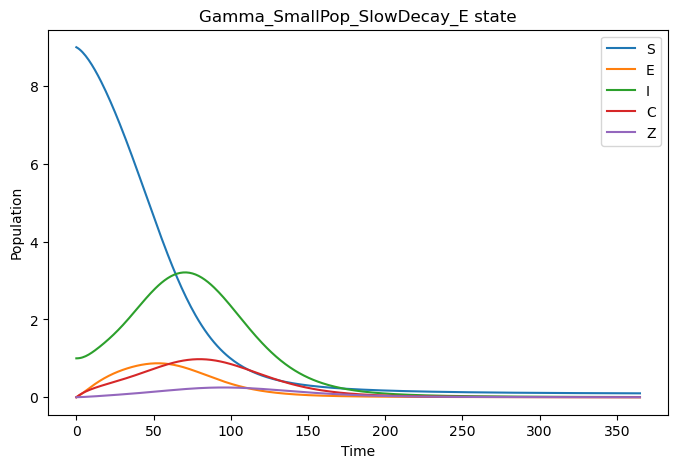

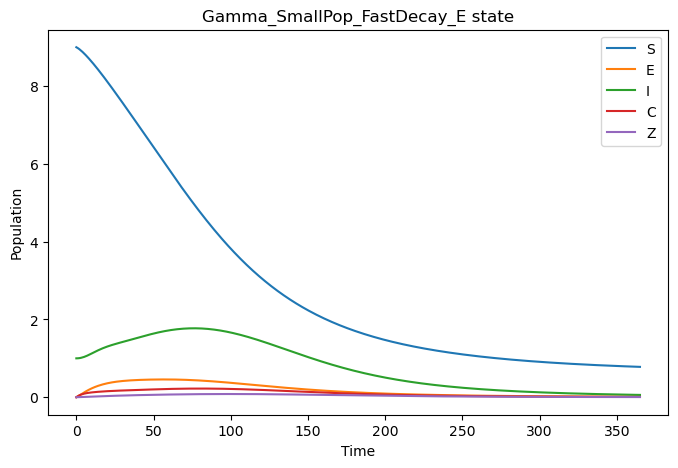

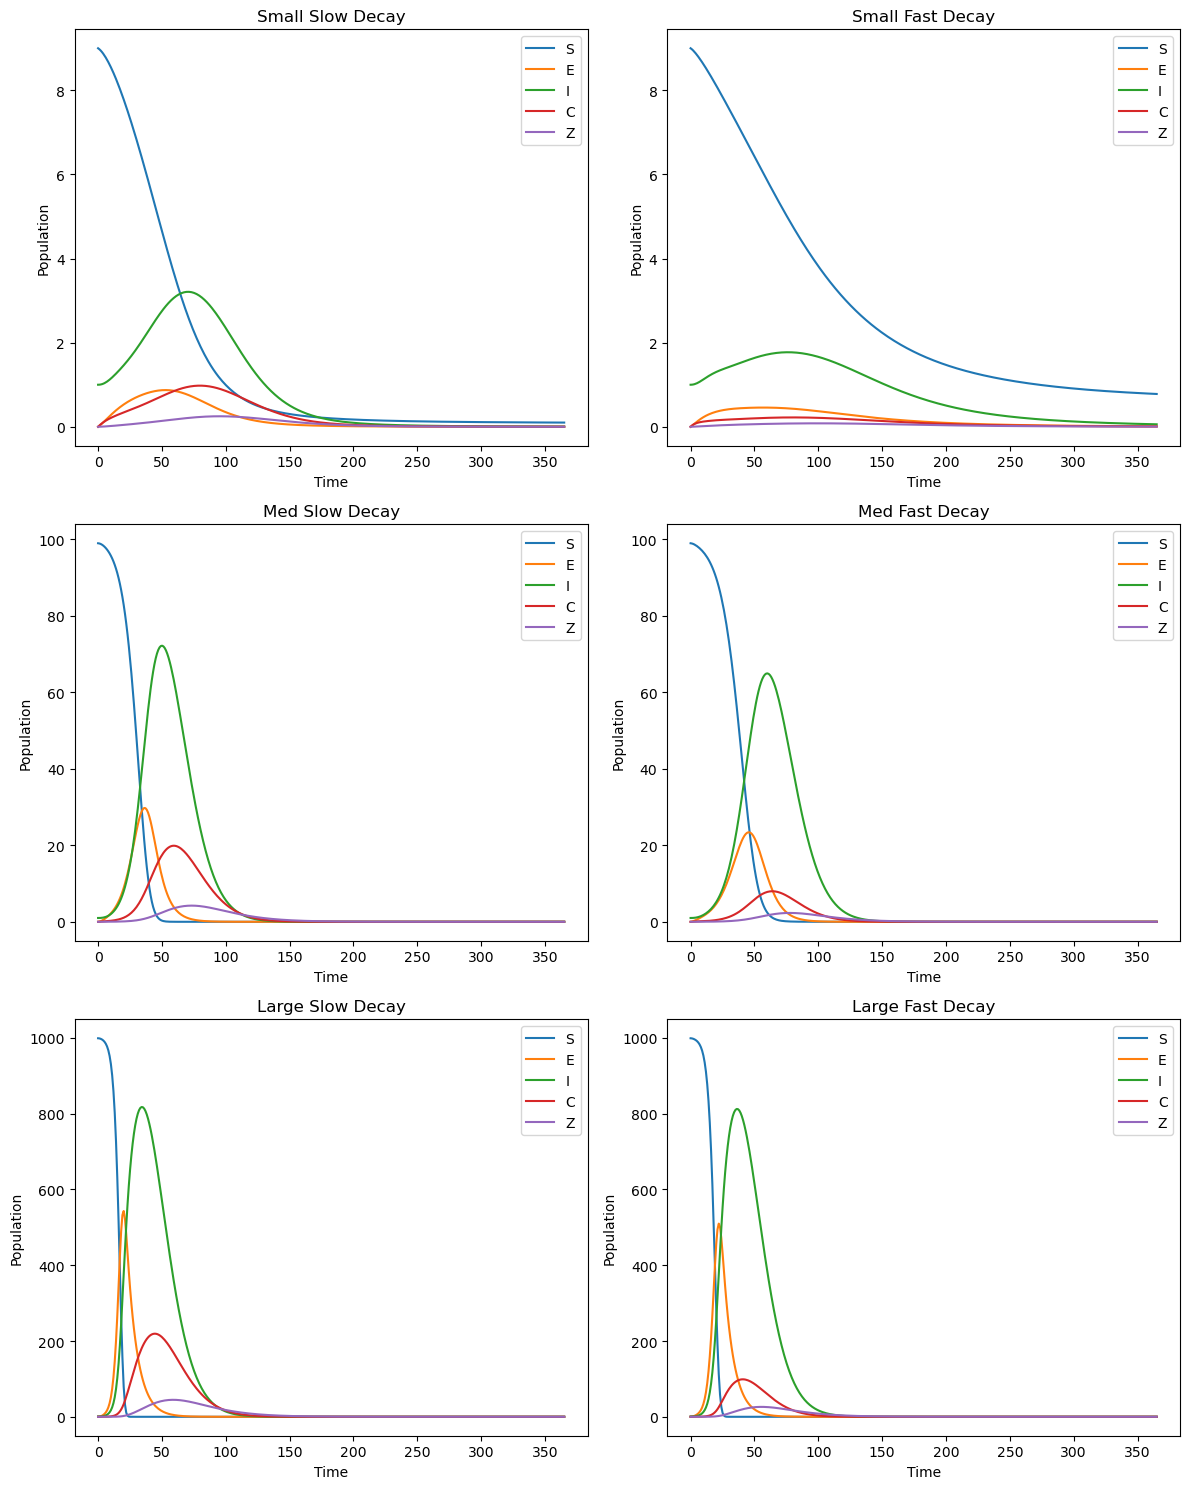

In [8]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint

import matplotlib.pyplot as plt

# Model with Exposed class
def SICZ_gamma_exposed(x, t, parameters):
    S, E, I1, I2, I3, I4, I5, C, Z = x
    I = I1 + I2 + I3 + I4 + I5
    N = S + I + C + E

    beta_p = parameters['beta_p']
    beta_c = parameters['beta_c']
    beta_z = parameters['beta_z']
    a = parameters['a']
    lamdaC = parameters['lamdaC']
    sigma = parameters['sigma']
    mu = parameters['mu']
    lamdaZ = parameters['lamdaZ']
    gamma = parameters['gamma']

    dS = -(S * beta_p * (I / N)) - (S * beta_c * C) - (S * beta_z * Z)
    dE = (S * beta_p * (I / N)) + (S * beta_c * C) + (S * beta_z * Z) - (gamma * E)
    dI1 = (gamma * E) - (5 * I1 * a)
    dI2 = (5 * I1 * a) - (5 * I2 * a)
    dI3 = (5 * I2 * a) - (5 * I3 * a)
    dI4 = (5 * I3 * a) - (5 * I4 * a)
    dI5 = (5 * I4 * a) - (5 * I5 * a)
    dC = (I * a) - (C * lamdaC)
    dZ = (I * sigma) + (C * mu) - (Z * lamdaZ)

    return [dS, dE, dI1, dI2, dI3, dI4, dI5, dC, dZ]

# Initial conditions
initial_cond_Large_Exposed = [999, 0, 1, 0, 0, 0, 0, 0, 0]
initial_cond_Med_Exposed = [99, 0, 1, 0, 0, 0, 0, 0, 0]
initial_cond_Small_Exposed = [9, 0, 1, 0, 0, 0, 0, 0, 0]

times = np.linspace(0, 365, 365)
newparams_Exposed = {
    "beta_p": 0.023, "beta_c": 0.023, "beta_z": 0.0001,
    "lamdaC": 1/10, "lamdaZ": 1/21.6, "sigma": 0.001,
    "mu": 0.01, "a": 0.17/5.4, "gamma": 1/8
}
params_Exposed = {
    "beta_p": 0.023, "beta_c": 0.023, "beta_z": 0.0001,
    "lamdaC": 1/4, "lamdaZ": 1/21.6, "sigma": 0.001,
    "mu": 0.01, "a": 0.17/5.4, "gamma": 1/8
}

# Run ODEs
resultsSICZGammaLarge_SlowDecay_Exposed = odeint(SICZ_gamma_exposed, initial_cond_Large_Exposed, times, args=(newparams_Exposed,))
resultsSICZGammaMed_SlowDecay_Exposed = odeint(SICZ_gamma_exposed, initial_cond_Med_Exposed, times, args=(newparams_Exposed,))
resultsSICZGammaSmall_SlowDecay_Exposed = odeint(SICZ_gamma_exposed, initial_cond_Small_Exposed, times, args=(newparams_Exposed,))
resultsSICZGammaSmall_FastDecay_Exposed = odeint(SICZ_gamma_exposed, initial_cond_Small_Exposed, times, args=(params_Exposed,))
resultsSICZGammaMed_FastDecay_Exposed = odeint(SICZ_gamma_exposed, initial_cond_Med_Exposed, times, args=(params_Exposed,))
resultsSICZGammaLarge_FastDecay_Exposed = odeint(SICZ_gamma_exposed, initial_cond_Large_Exposed, times, args=(params_Exposed,))

# Convert to DataFrames
def to_df(results, times):
    df = pd.DataFrame(results, columns=['S', 'E', 'I1', 'I2', 'I3', 'I4', 'I5', 'C', 'Z'])
    df['I'] = df[['I1', 'I2', 'I3', 'I4', 'I5']].sum(axis=1)
    df['time'] = times
    return df

dfLargeSlow = to_df(resultsSICZGammaLarge_SlowDecay_Exposed, times)
dfLargeFast = to_df(resultsSICZGammaLarge_FastDecay_Exposed, times)
dfMedSlow = to_df(resultsSICZGammaMed_SlowDecay_Exposed, times)
dfMedFast = to_df(resultsSICZGammaMed_FastDecay_Exposed, times)
dfSmallSlow = to_df(resultsSICZGammaSmall_SlowDecay_Exposed, times)
dfSmallFast = to_df(resultsSICZGammaSmall_FastDecay_Exposed, times)

# Plotting
def plot_population(df, title):
    plt.figure(figsize=(8, 5))
    plt.plot(df['time'], df['S'], label='S')
    plt.plot(df['time'], df['E'], label='E')
    plt.plot(df['time'], df['I'], label='I')
    plt.plot(df['time'], df['C'], label='C')
    plt.plot(df['time'], df['Z'], label='Z')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

plot_population(dfLargeSlow, "Gamma_LargePop_SlowDecay_E state")
plot_population(dfLargeFast, "Gamma_LargePop_FastDecay_E state")
plot_population(dfMedSlow, "Gamma_MedPop_SlowDecay_E state")
plot_population(dfMedFast, "Gamma_MedPop_FastDecay_E state")
plot_population(dfSmallSlow, "Gamma_SmallPop_SlowDecay_E state")
plot_population(dfSmallFast, "Gamma_SmallPop_FastDecay_E state")

# Comparison plot (side by side)
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
for ax, df, title in zip(axes.flatten(),
    [dfSmallSlow, dfSmallFast, dfMedSlow, dfMedFast, dfLargeSlow, dfLargeFast],
    ["Small Slow Decay", "Small Fast Decay", "Med Slow Decay", "Med Fast Decay", "Large Slow Decay", "Large Fast Decay"]):
    ax.plot(df['time'], df['S'], label='S')
    ax.plot(df['time'], df['E'], label='E')
    ax.plot(df['time'], df['I'], label='I')
    ax.plot(df['time'], df['C'], label='C')
    ax.plot(df['time'], df['Z'], label='Z')
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    ax.legend()
plt.tight_layout()
plt.show()


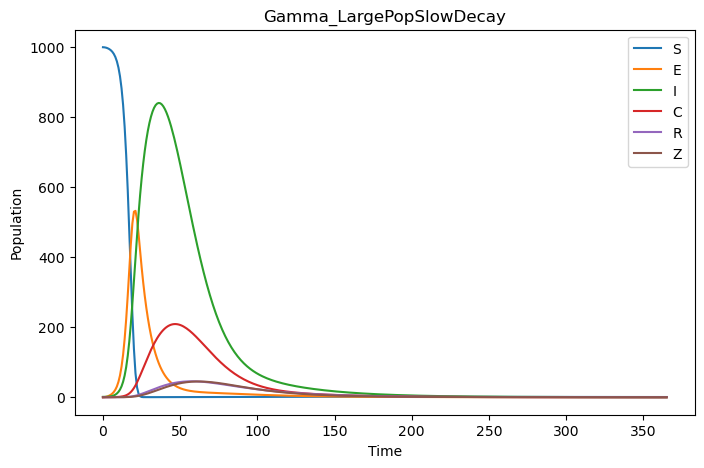

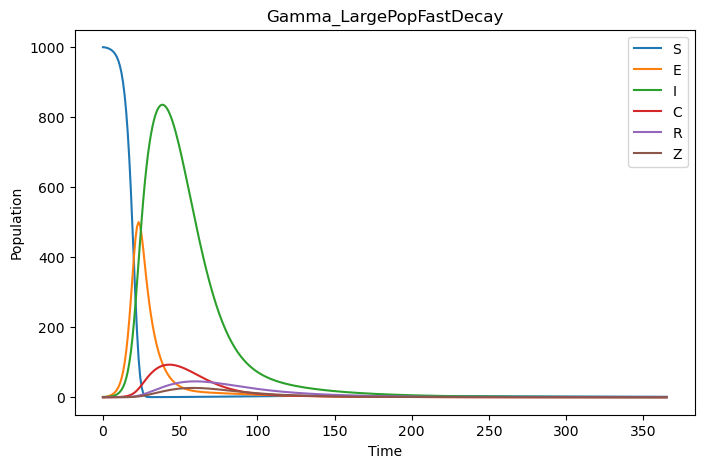

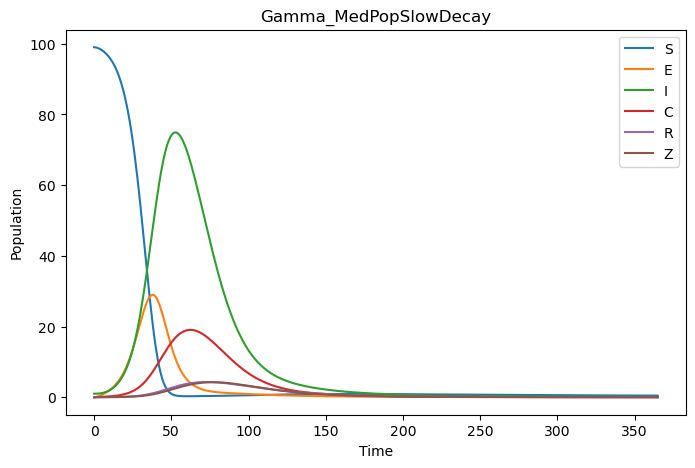

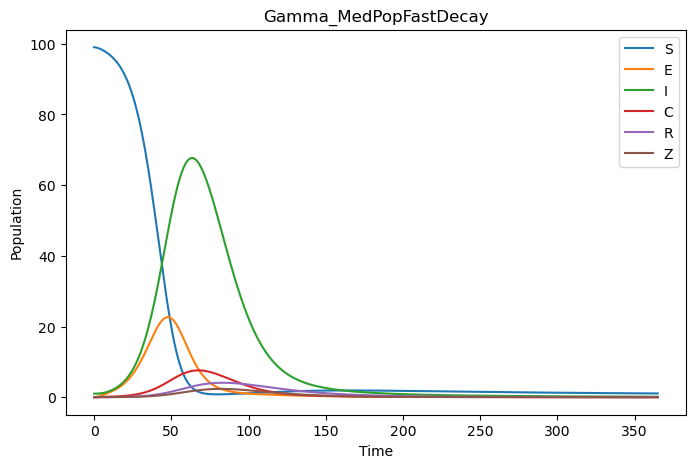

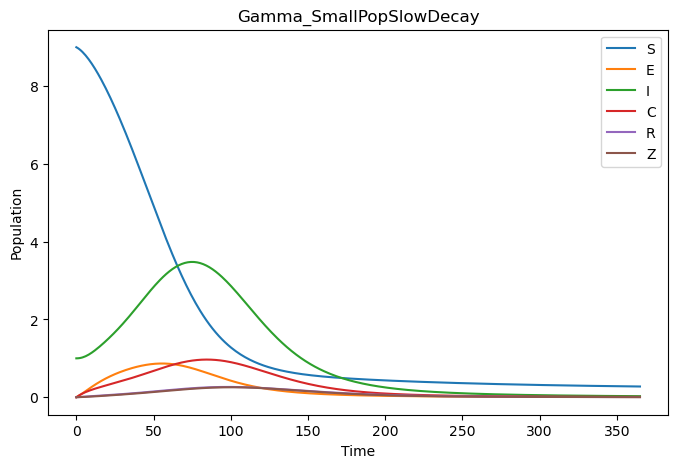

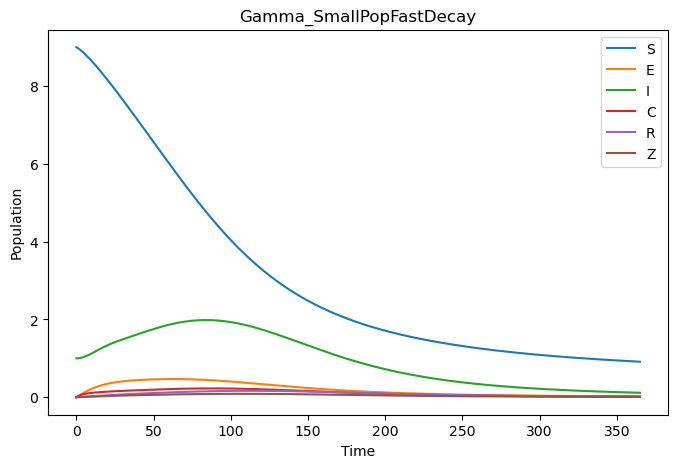

In [9]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint

import matplotlib.pyplot as plt

# Model function
def SICZ_gamma_exposed_recovered(x, t, params):
    S, E, I1, I2, I3, I4, I5, R, C, Z = x
    I = I1 + I2 + I3 + I4 + I5
    N = S + I + C + E + R

    beta_p = params['beta_p']
    beta_c = params['beta_c']
    beta_z = params['beta_z']
    a = params['a']
    lamdaC = params['lamdaC']
    sigma = params['sigma']
    mu = params['mu']
    lamdaZ = params['lamdaZ']
    gamma = params['gamma']
    w = params['w']
    lamdaI = params['lamdaI']

    dS = -(S * beta_p * (I / N)) - (S * beta_c * C) - (S * beta_z * Z) + (R * w)
    dE = (S * beta_p * (I / N)) + (S * beta_c * C) + (S * beta_z * Z) - (gamma * E)
    dI1 = (gamma * E) - (5 * I1 * a)
    dI2 = (5 * I1 * a) - (5 * I2 * a)
    dI3 = (5 * I2 * a) - (5 * I3 * a)
    dI4 = (5 * I3 * a) - (5 * I4 * a)
    dI5 = (5 * I4 * a) - (5 * I5 * a)
    dR = (I * lamdaI) - (R * w)
    dC = (I * a) - (C * lamdaC)
    dZ = (I * sigma) + (C * mu) - (Z * lamdaZ)
    return [dS, dE, dI1, dI2, dI3, dI4, dI5, dR, dC, dZ]

# Initial conditions
intial_cond_Large_Exposed_Recovered = [999, 0, 1, 0, 0, 0, 0, 0, 0, 0]
intial_cond_Med_Exposed_Recovered = [99, 0, 1, 0, 0, 0, 0, 0, 0, 0]
intial_cond_Small_Exposed_Recovered = [9, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# Time points
times = np.linspace(0, 365, 365)

# Parameters
newparams_Exposed_Recovered = {
    "beta_p": 0.023, "beta_c": 0.023, "beta_z": 0.0001, "lamdaC": (1/10),
    "lamdaI": ((1/30)*.09), "w": (1/30), "lamdaZ": (1/21.6), "sigma": 0.001,
    "mu": 0.01, "a": ((0.17/5.4)*.91), "gamma": (1/8)
}
params_Exposed_Recovered = {
    "beta_p": 0.023, "beta_c": 0.023, "beta_z": 0.0001, "lamdaC": (1/4),
    "lamdaI": ((1/30)*.09), "w": (1/30), "lamdaZ": (1/21.6), "sigma": 0.001,
    "mu": 0.01, "a": ((0.17/5.4)*.91), "gamma": (1/8)
}

# Run simulations
resultsSICZGammaLarge_SlowDecay_Exposed_Recovered = odeint(
    SICZ_gamma_exposed_recovered, intial_cond_Large_Exposed_Recovered, times, args=(newparams_Exposed_Recovered,))
resultsSICZGammaLarge_FastDecay_Exposed_Recovered = odeint(
    SICZ_gamma_exposed_recovered, intial_cond_Large_Exposed_Recovered, times, args=(params_Exposed_Recovered,))
resultsSICZGammaMed_SlowDecay_Exposed_Recovered = odeint(
    SICZ_gamma_exposed_recovered, intial_cond_Med_Exposed_Recovered, times, args=(newparams_Exposed_Recovered,))
resultsSICZGammaMed_FastDecay_Exposed_Recovered = odeint(
    SICZ_gamma_exposed_recovered, intial_cond_Med_Exposed_Recovered, times, args=(params_Exposed_Recovered,))
resultsSICZGammaSmall_SlowDecay_Exposed_Recovered = odeint(
    SICZ_gamma_exposed_recovered, intial_cond_Small_Exposed_Recovered, times, args=(newparams_Exposed_Recovered,))
resultsSICZGammaSmall_FastDecay_Exposed_Recovered = odeint(
    SICZ_gamma_exposed_recovered, intial_cond_Small_Exposed_Recovered, times, args=(params_Exposed_Recovered,))

# Convert to DataFrames
columns = ['S', 'E', 'I1', 'I2', 'I3', 'I4', 'I5', 'R', 'C', 'Z']
def add_I_column(df):
    df['I'] = df[['I1', 'I2', 'I3', 'I4', 'I5']].sum(axis=1)
    return df

dfLargeSlow = pd.DataFrame(resultsSICZGammaLarge_SlowDecay_Exposed_Recovered, columns=columns)
dfLargeSlow['time'] = times
dfLargeSlow = add_I_column(dfLargeSlow)

dfLargeFast = pd.DataFrame(resultsSICZGammaLarge_FastDecay_Exposed_Recovered, columns=columns)
dfLargeFast['time'] = times
dfLargeFast = add_I_column(dfLargeFast)

dfMedSlow = pd.DataFrame(resultsSICZGammaMed_SlowDecay_Exposed_Recovered, columns=columns)
dfMedSlow['time'] = times
dfMedSlow = add_I_column(dfMedSlow)

dfMedFast = pd.DataFrame(resultsSICZGammaMed_FastDecay_Exposed_Recovered, columns=columns)
dfMedFast['time'] = times
dfMedFast = add_I_column(dfMedFast)

dfSmallSlow = pd.DataFrame(resultsSICZGammaSmall_SlowDecay_Exposed_Recovered, columns=columns)
dfSmallSlow['time'] = times
dfSmallSlow = add_I_column(dfSmallSlow)

dfSmallFast = pd.DataFrame(resultsSICZGammaSmall_FastDecay_Exposed_Recovered, columns=columns)
dfSmallFast['time'] = times
dfSmallFast = add_I_column(dfSmallFast)

# Plotting function
def plot_population(df, title):
    plt.figure(figsize=(8, 5))
    plt.plot(df['time'], df['S'], label='S')
    plt.plot(df['time'], df['E'], label='E')
    plt.plot(df['time'], df['I'], label='I')
    plt.plot(df['time'], df['C'], label='C')
    plt.plot(df['time'], df['R'], label='R')
    plt.plot(df['time'], df['Z'], label='Z')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

# Example plot
plot_population(dfLargeSlow, "Gamma_LargePopSlowDecay")
plot_population(dfLargeFast, "Gamma_LargePopFastDecay")
plot_population(dfMedSlow, "Gamma_MedPopSlowDecay")
plot_population(dfMedFast, "Gamma_MedPopFastDecay")
plot_population(dfSmallSlow, "Gamma_SmallPopSlowDecay")
plot_population(dfSmallFast, "Gamma_SmallPopFastDecay")

# Combine last rows for summary
newdf = pd.concat([
    dfSmallFast.iloc[[-1]],
    dfSmallSlow.iloc[[-1]],
    dfMedFast.iloc[[-1]],
    dfMedSlow.iloc[[-1]],
    dfLargeFast.iloc[[-1]],
    dfLargeSlow.iloc[[-1]]
], ignore_index=True)


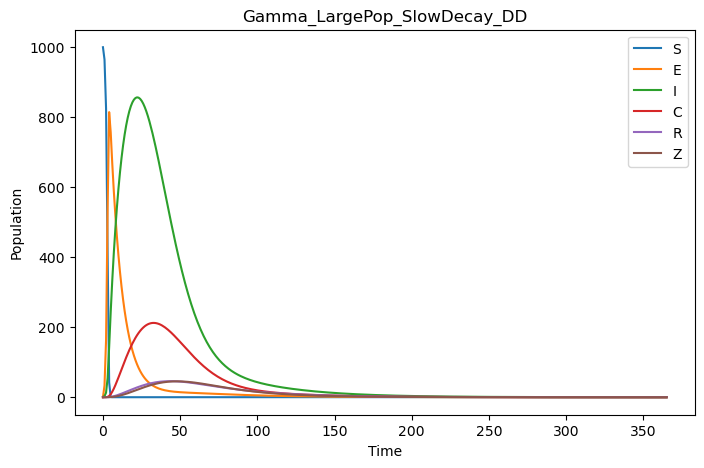

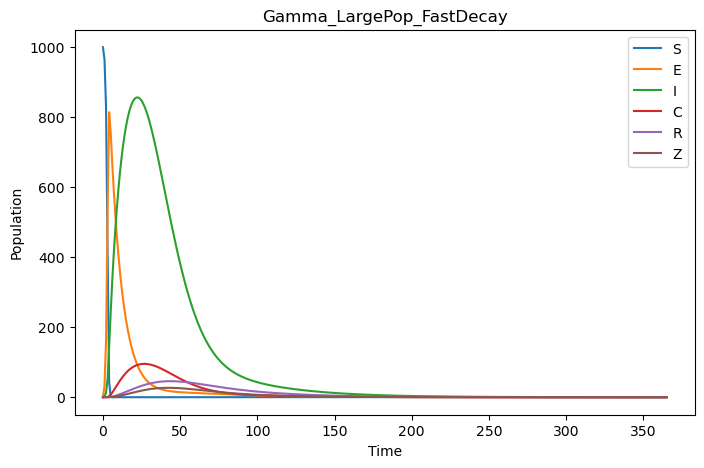

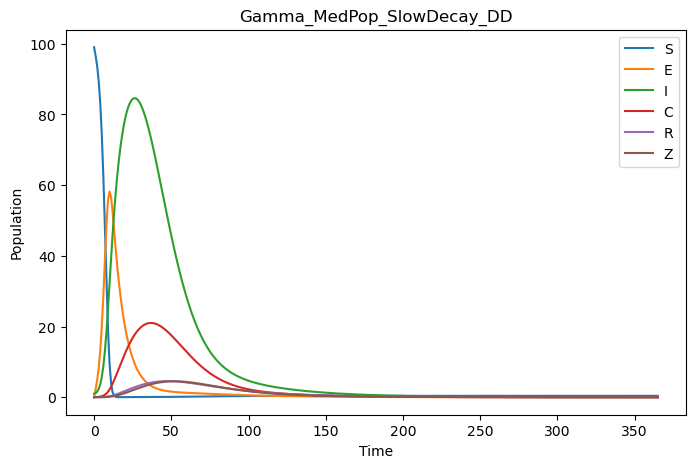

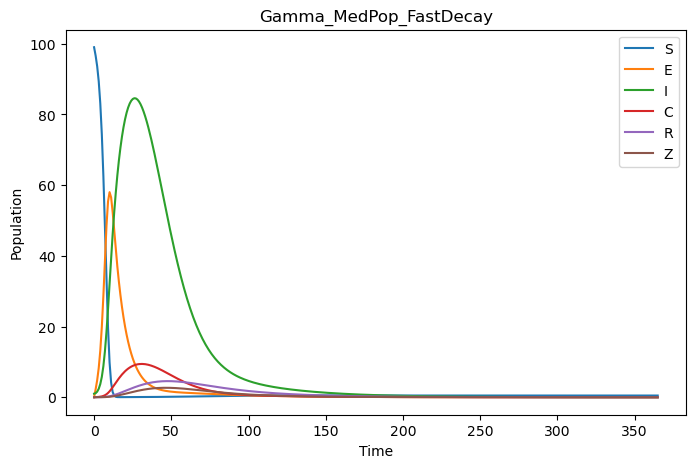

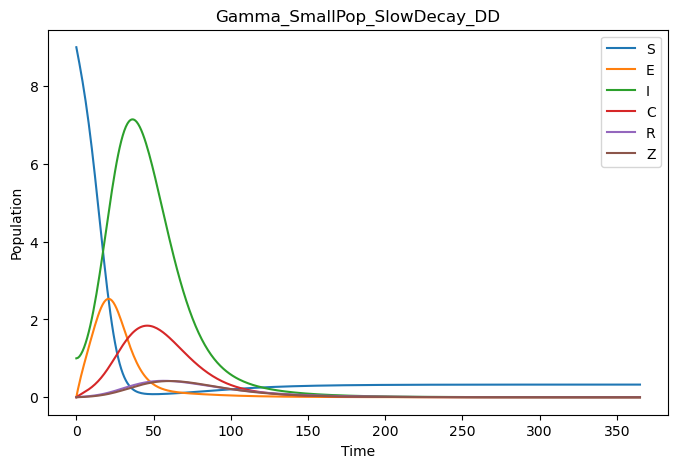

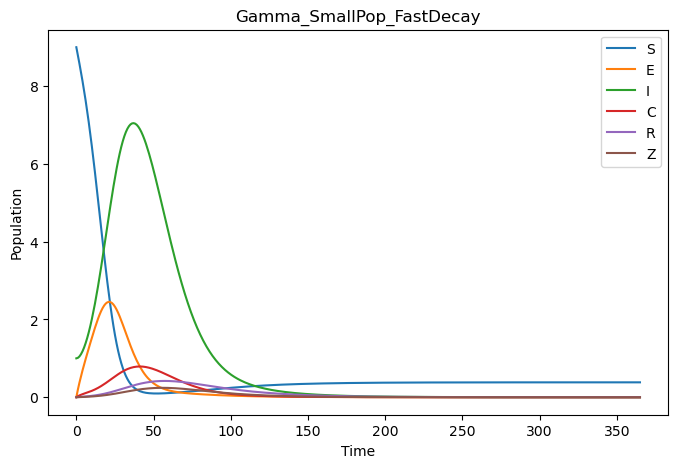

In [10]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint

import matplotlib.pyplot as plt

def SICZ_gamma_exposed_recovered_dependent(x, t, parameters):
    S, E, I1, I2, I3, I4, I5, R, C, Z = x
    I = I1 + I2 + I3 + I4 + I5
    N = S + I + C + E + R

    beta_p = parameters['beta_p']
    beta_c = parameters['beta_c']
    beta_z = parameters['beta_z']
    a = parameters['a']
    lamdaC = parameters['lamdaC']
    sigma = parameters['sigma']
    mu = parameters['mu']
    lamdaZ = parameters['lamdaZ']
    gamma = parameters['gamma']
    w = parameters['w']
    lamdaI = parameters['lamdaI']

    dS = -(S * beta_p * I) - (S * beta_c * C) - (S * beta_z * Z) + (R * w)
    dE = (S * beta_p * I) + (S * beta_c * C) + (S * beta_z * Z) - (gamma * E)
    dI1 = (gamma * E) - (5 * I1 * a)
    dI2 = (5 * I1 * a) - (5 * I2 * a)
    dI3 = (5 * I2 * a) - (5 * I3 * a)
    dI4 = (5 * I3 * a) - (5 * I4 * a)
    dI5 = (5 * I4 * a) - (5 * I5 * a)
    dR = (I * lamdaI) - (R * w)
    dC = (I * a) - (C * lamdaC)
    dZ = (I * sigma) + (C * mu) - (Z * lamdaZ)

    return [dS, dE, dI1, dI2, dI3, dI4, dI5, dR, dC, dZ]

intial_cond_Large_Exposed_Recovered = [999, 0, 1, 0, 0, 0, 0, 0, 0, 0]
intial_cond_Med_Exposed_Recovered = [99, 0, 1, 0, 0, 0, 0, 0, 0, 0]
intial_cond_Small_Exposed_Recovered = [9, 0, 1, 0, 0, 0, 0, 0, 0, 0]

times = np.linspace(0, 365, 365)
newparams_Exposed_Recovered = {
    "beta_p": 0.023, "beta_c": 0.023, "beta_z": 0.0001, "lamdaC": 1/10,
    "lamdaI": (1/30)*.09, "w": 1/30, "lamdaZ": 1/21.6, "sigma": 0.001,
    "mu": 0.01, "a": (0.17/5.4)*.91, "gamma": 1/8
}
params_Exposed_Recovered = {
    "beta_p": 0.023, "beta_c": 0.023, "beta_z": 0.0001, "lamdaC": 1/4,
    "lamdaI": (1/30)*.09, "w": 1/30, "lamdaZ": 1/21.6, "sigma": 0.001,
    "mu": 0.01, "a": (0.17/5.4)*.91, "gamma": 1/8
}

def run_model(initial_cond, params):
    result = odeint(SICZ_gamma_exposed_recovered_dependent, initial_cond, times, args=(params,))
    df = pd.DataFrame(result, columns=['S', 'E', 'I1', 'I2', 'I3', 'I4', 'I5', 'R', 'C', 'Z'])
    df['time'] = times
    df['I'] = df['I1'] + df['I2'] + df['I3'] + df['I4'] + df['I5']
    return df

resultsSICZGammaLarge_SlowDecay_Exposed_Recovered = run_model(intial_cond_Large_Exposed_Recovered, newparams_Exposed_Recovered)
resultsSICZGammaLarge_FastDecay_Exposed_Recovered = run_model(intial_cond_Large_Exposed_Recovered, params_Exposed_Recovered)
resultsSICZGammaMed_SlowDecay_Exposed_Recovered = run_model(intial_cond_Med_Exposed_Recovered, newparams_Exposed_Recovered)
resultsSICZGammaMed_FastDecay_Exposed_Recovered = run_model(intial_cond_Med_Exposed_Recovered, params_Exposed_Recovered)
resultsSICZGammaSmall_SlowDecay_Exposed_Recovered = run_model(intial_cond_Small_Exposed_Recovered, newparams_Exposed_Recovered)
resultsSICZGammaSmall_FastDecay_Exposed_Recovered = run_model(intial_cond_Small_Exposed_Recovered, params_Exposed_Recovered)

def plot_results(df, title):
    plt.figure(figsize=(8, 5))
    plt.plot(df['time'], df['S'], label='S')
    plt.plot(df['time'], df['E'], label='E')
    plt.plot(df['time'], df['I'], label='I')
    plt.plot(df['time'], df['C'], label='C')
    plt.plot(df['time'], df['R'], label='R')
    plt.plot(df['time'], df['Z'], label='Z')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

plot_results(resultsSICZGammaLarge_SlowDecay_Exposed_Recovered, "Gamma_LargePop_SlowDecay_DD")
plot_results(resultsSICZGammaLarge_FastDecay_Exposed_Recovered, "Gamma_LargePop_FastDecay")
plot_results(resultsSICZGammaMed_SlowDecay_Exposed_Recovered, "Gamma_MedPop_SlowDecay_DD")
plot_results(resultsSICZGammaMed_FastDecay_Exposed_Recovered, "Gamma_MedPop_FastDecay")
plot_results(resultsSICZGammaSmall_SlowDecay_Exposed_Recovered, "Gamma_SmallPop_SlowDecay_DD")
plot_results(resultsSICZGammaSmall_FastDecay_Exposed_Recovered, "Gamma_SmallPop_FastDecay")

newdf = pd.concat([
    resultsSICZGammaSmall_FastDecay_Exposed_Recovered.iloc[[-1]],
    resultsSICZGammaSmall_SlowDecay_Exposed_Recovered.iloc[[-1]],
    resultsSICZGammaMed_FastDecay_Exposed_Recovered.iloc[[-1]],
    resultsSICZGammaMed_SlowDecay_Exposed_Recovered.iloc[[-1]],
    resultsSICZGammaLarge_FastDecay_Exposed_Recovered.iloc[[-1]],
    resultsSICZGammaLarge_SlowDecay_Exposed_Recovered.iloc[[-1]],
], ignore_index=True)


- Downloaded an R.code file and imported it into VScode
- Used Copilot to troubleshoot problems downoading the scipy package
- Then copy and pasted the sections of data in and translated it to python using Copilot
- This created the multiple graphs above. The first set of plots are the genral ones for small, medium, and large populations and the rest integrate different variables in.